In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
from neuralprophet import NeuralProphet
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Read data from JSON file
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data['Time Series (Daily)']

file_path = 'IBM_daily.json'
stock_data = read_json(file_path)


In [3]:
stock_data

{'2024-02-16': {'1. open': '186.6300',
  '2. high': '188.9500',
  '3. low': '185.9452',
  '4. close': '187.6400',
  '5. volume': '4842840'},
 '2024-02-15': {'1. open': '183.6200',
  '2. high': '186.9800',
  '3. low': '183.6200',
  '4. close': '186.8700',
  '5. volume': '4714301'},
 '2024-02-14': {'1. open': '185.0000',
  '2. high': '185.0000',
  '3. low': '182.2600',
  '4. close': '183.5700',
  '5. volume': '3173391'},
 '2024-02-13': {'1. open': '184.2800',
  '2. high': '184.7700',
  '3. low': '182.3600',
  '4. close': '183.7000',
  '5. volume': '4290453'},
 '2024-02-12': {'1. open': '185.9000',
  '2. high': '186.4800',
  '3. low': '184.0300',
  '4. close': '186.1600',
  '5. volume': '4724021'},
 '2024-02-09': {'1. open': '184.4400',
  '2. high': '187.1800',
  '3. low': '183.8500',
  '4. close': '186.3400',
  '5. volume': '5064641'},
 '2024-02-08': {'1. open': '182.6300',
  '2. high': '184.5500',
  '3. low': '181.4900',
  '4. close': '184.3600',
  '5. volume': '5161185'},
 '2024-02-07'

In [4]:
# Convert data to DataFrame
df = pd.DataFrame.from_dict(stock_data)

In [5]:
df.head()

,2024-02-16,2024-02-15,2024-02-14,2024-02-13,2024-02-12,2024-02-09,2024-02-08,2024-02-07,2024-02-06,2024-02-05,...,2023-10-09,2023-10-06,2023-10-05,2023-10-04,2023-10-03,2023-10-02,2023-09-29,2023-09-28,2023-09-27,2023-09-26
1. open,186.6300,183.6200,185.0000,184.2800,185.9000,184.4400,182.6300,183.3400,183.5500,185.5100,...,142.3000,141.4000,140.9000,140.3700,140.8700,140.0400,142.0000,142.1400,143.6700,145.5100
2. high,188.9500,186.9800,185.0000,184.7700,186.4800,187.1800,184.5500,184.0200,184.6800,185.7800,...,142.4000,142.9400,141.7000,141.2004,141.6400,141.4500,142.1300,142.2820,143.8200,146.1700
3. low,185.9452,183.6200,182.2600,182.3600,184.0300,183.8500,181.4900,182.6250,183.0400,183.2550,...,140.6800,140.1100,140.1900,139.9900,140.0000,139.8600,139.6100,140.2050,141.7600,143.0201
4. close,187.6400,186.8700,183.5700,183.7000,186.1600,186.3400,184.3600,183.7400,183.4100,183.4200,...,142.2000,142.0300,141.5200,141.0700,140.3900,140.8000,140.3000,141.5800,143.1700,143.2400
5. volume,4842840,4714301,3173391,4290453,4724021,5064641,5161185,4841188,3338196,4379602,...,2354396,3511347,3223910,2637779,3284421,3275461,5703983,5783422,4439121,4824654


In [6]:
transposed_df = df.transpose()

In [7]:
transposed_df.head()

,1. open,2. high,3. low,4. close,5. volume
2024-02-16,186.6300,188.9500,185.9452,187.6400,4842840
2024-02-15,183.6200,186.9800,183.6200,186.8700,4714301
2024-02-14,185.0000,185.0000,182.2600,183.5700,3173391
2024-02-13,184.2800,184.7700,182.3600,183.7000,4290453
2024-02-12,185.9000,186.4800,184.0300,186.1600,4724021


In [8]:
transposed_df.columns = [col.split('. ')[1] for col in transposed_df.columns]
transposed_df.head()

,open,high,low,close,volume
2024-02-16,186.6300,188.9500,185.9452,187.6400,4842840
2024-02-15,183.6200,186.9800,183.6200,186.8700,4714301
2024-02-14,185.0000,185.0000,182.2600,183.5700,3173391
2024-02-13,184.2800,184.7700,182.3600,183.7000,4290453
2024-02-12,185.9000,186.4800,184.0300,186.1600,4724021


In [9]:
transposed_df.shape

(100, 5)

In [10]:
transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2024-02-16 to 2023-09-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    100 non-null    object
 1   high    100 non-null    object
 2   low     100 non-null    object
 3   close   100 non-null    object
 4   volume  100 non-null    object
dtypes: object(5)
memory usage: 8.8+ KB


In [11]:
transposed_df = transposed_df.astype('float64')

In [12]:
transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2024-02-16 to 2023-09-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 8.8+ KB


In [13]:
transposed_df.describe()

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,158.647900,159.859464,157.676160,158.906200,4.623329e+06
std,15.405522,15.755077,15.223682,15.483651,3.026878e+06
min,136.630000,137.680000,135.870000,136.380000,1.772443e+06
25%,144.667500,145.817500,142.912575,144.420000,3.336143e+06
50%,159.955000,160.835000,159.090000,160.090000,4.070738e+06
75%,164.062500,166.070000,163.040000,164.982500,4.870191e+06
max,191.310000,196.900000,186.770000,190.430000,2.959624e+07


In [14]:
transposed_df['ds'] = pd.to_datetime(transposed_df.index)
transposed_df = transposed_df.rename(columns={'volume': 'y'})

In [15]:
transposed_df.head()

,open,high,low,close,y,ds
2024-02-16,186.63,188.95,185.9452,187.64,4842840.0,2024-02-16
2024-02-15,183.62,186.98,183.6200,186.87,4714301.0,2024-02-15
2024-02-14,185.00,185.00,182.2600,183.57,3173391.0,2024-02-14
2024-02-13,184.28,184.77,182.3600,183.70,4290453.0,2024-02-13
2024-02-12,185.90,186.48,184.0300,186.16,4724021.0,2024-02-12


In [16]:
data = transposed_df[['ds', 'y']]

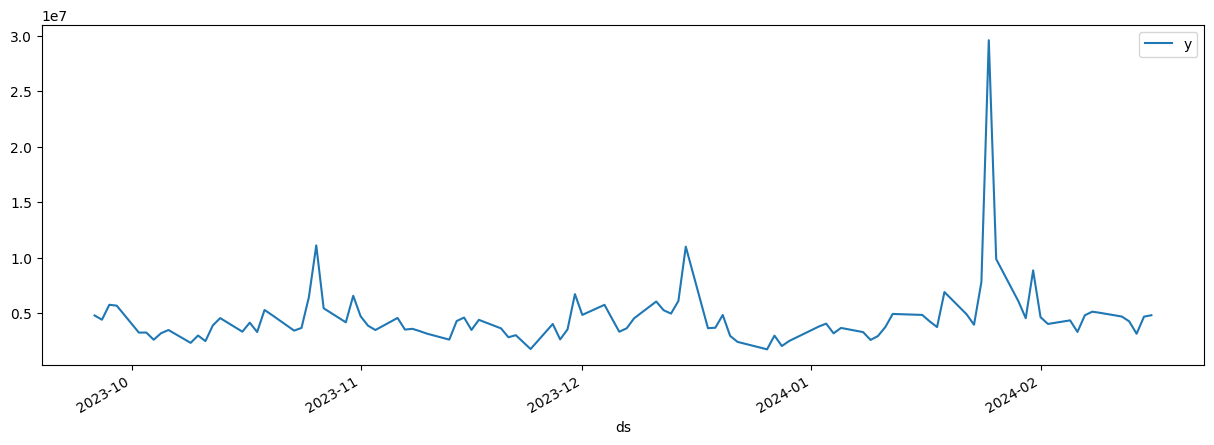

In [17]:
plt = data.plot(x="ds", y="y", figsize=(15, 5))

In [18]:
# Step 3: Train the model
model = NeuralProphet()
metrics = model.fit(data, freq='D')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 78.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 250
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the lear

Finding best initial lr:   0%|          | 0/207 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [19]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,6762923.000,8050605.50,0.685454,0.0,0
1,5967003.000,7292284.00,0.600942,0.0,1
2,6007162.500,7150807.00,0.603911,0.0,2
3,5509671.000,6617142.50,0.553243,0.0,3
4,5656254.500,6741679.00,0.552754,0.0,4
...,...,...,...,...,...
245,1271147.875,2220542.25,0.092729,0.0,245
246,1219261.750,2075292.25,0.088286,0.0,246
247,1225877.875,2111064.50,0.091181,0.0,247
248,1192216.625,2155069.00,0.087175,0.0,248


In [20]:
# Use static plotly in notebooks
model.set_plotting_backend("plotly-static")

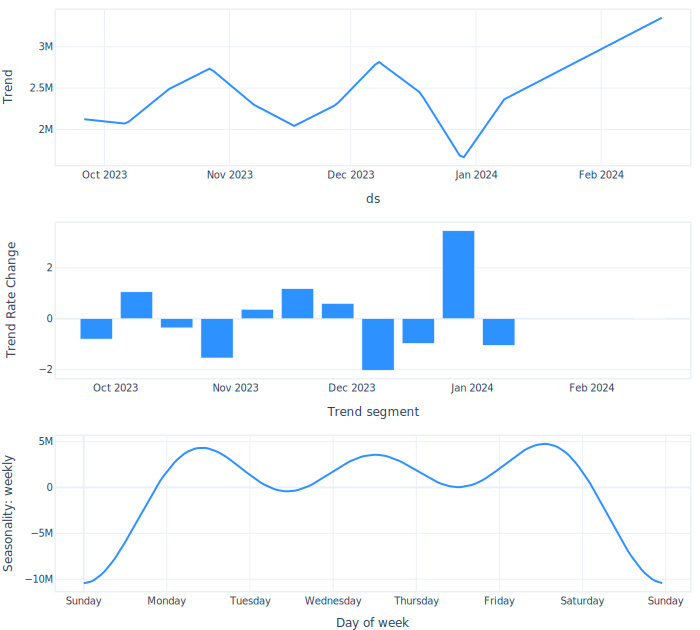

In [21]:
model.plot_parameters()

In [68]:
# Step 4: Make predictions for the next week
future = model.make_future_dataframe(data, periods=7, n_historic_predictions=True)
forecast = model.predict(future)
next_week_forecast = forecast.tail(7)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 78.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 72.897% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 72.897% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.data.processing._handle_missing_data) - Dropped 7 rows at the end with NaNs in 'y' column.


Predicting: 7it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


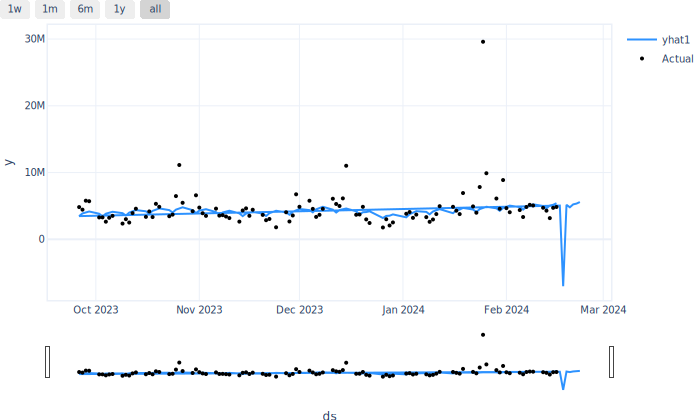

In [69]:
model.plot(forecast)

In [70]:
# Step 5: Output the predictions
next_week_start_date = next_week_forecast['ds'].iloc[0] + timedelta(days=1)
next_week_end_date = next_week_forecast['ds'].iloc[0] + timedelta(days=30)
next_week_prediction = next_week_forecast[['ds', 'yhat1']].rename(columns={'yhat1': 'prediction'})
next_week_prediction['ds'] = next_week_prediction['ds'].dt.strftime('%Y-%m-%d')

print("Next week predictions:")
print(next_week_prediction)

Next week predictions:
             ds  prediction
100  2024-02-17   5053691.0
101  2024-02-18  -7033684.0
102  2024-02-19   5165354.0
103  2024-02-20   4793516.0
104  2024-02-21   5232597.0
105  2024-02-22   5350565.0
106  2024-02-23   5582478.0
